# Getting started with Fast.ai

As of 2019, fast.ai supports 4 types of DL applications
 - computer vision
 - natural language text
 - tabular data
 - collaborative filtering

Fast.ai uses type strings introduced in Python 3.5 quite heavily. Thus if you type `help(fastai.untar_data)`, you notice type strings.

## Import fast.ai

In [1]:
import fastai

In [6]:
from fastai.vision import *
from fastai.metrics import error_rate

Inside colab, importing fastai, automatically imports the `datasets` moduel

In [4]:
fastai.datasets.URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [10]:
help(fastai.untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



## Image data bunches
Fast.ai has a useful called `ImageDataBunch` under the `fastai.vision.data` module. THis class helps in creating a structure of training, test data, data images, annotations etc, all into 1 class.

To load data into an image data bunch, do

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

Which gives you an Image data bunch object.

Just calling out the object will reveal the number of training, test datasets

```python
>>>data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,newfoundland,american_bulldog,american_pit_bull_terrier,saint_bernard
Path: /content/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
basset_hound,Persian,wheaten_terrier,shiba_inu,keeshond
Path: /content/data/oxford-iiit-pet/images;

Test: None
```

You can query just the validation data set as below:

```python
>>> data.valid_ds.x

ImageList (1478 items)
Image (3, 333, 500),Image (3, 333, 500),Image (3, 500, 333),Image (3, 500, 375),Image (3, 375, 500)
Path: /content/data/oxford-iiit-pet/images
```

To visually see a sample of the training data, use

```python
data.show_batch(rows=3, figsize=(7,6))
```
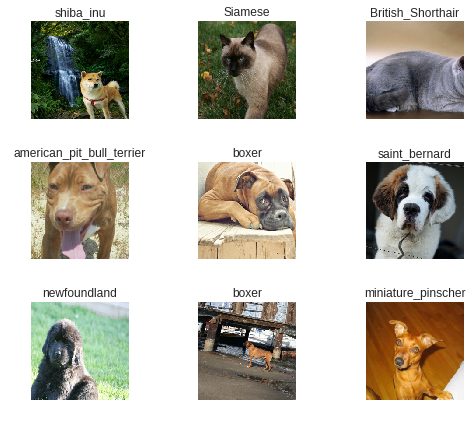

To get the list of data classes present in the training data, use
```python
>>> print(data.classes)
len(data.classes),data.c


['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

(37, 37)
```

## Training a neural net in fast.ai

There are 2 concepts at a high level:
 - **DataBunch:** A general fastai concept for your data, and from there, there are subclasses for particular applications like `ImageDataBunch`
 - **Learner:** A general concept for things that can learn to fit a model. From that, there are various subclasses to make things easier in particular, there is a convnet learner (something that will create a convolutional neural network for you).


The general syntax to instantiate a learner in fast ai is as below:

```python
learn = cnn_learner(<DataBunch obj>, <models.model>, metrics=error_rate)
```
such as
```python
>>> learn = cnn_learner(data, models.resnet34, metrics=error_rate)
>>> type(learn)
fastai.basic_train.Learner
```

fast.ai comes with several models. If you do a 

```
dir(fastai.vision.models)
```
you get
```
['BasicBlock', 'Darknet', 'DynamicUnet', 'ResLayer', 'ResNet', 'SqueezeNet',
 'UnetBlock', 'WideResNet', 'XResNet',
 'alexnet', 'darknet', 'densenet121', 'densenet161', 'densenet169',
 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50',
 'squeezenet1_0', 'squeezenet1_1', 'unet', 'vgg16_bn', 'vgg19_bn', 'wrn',
 'wrn_22', 'xception', 'xresnet', 'xresnet101', 'xresnet152', 'xresnet18',
 'xresnet34', 'xresnet50']
 ```

The `learner` object created already is validated against a validation set. The `ImageDataBunch` object already knows which is training and which is validation. Thus the `error_rate` parameter seeks to minimize test error and thereby **avoid overfitting**.

To start with, use `resnet34` which is pretty capable for most problems.

### Transfer learning
Resnet34 is a CNN that is trained on over a million images of various categories. This already knows to differentiatie between a large number of classes seen in everyday life. Thus, resnet34 is a generalist.

Transfer learning is the process of taking a generalist neural net and training it to become a specialist. We train the restnet34 in lesson 1 to classify between `37` classes of cats and dogs.

**Transfer learning allows you to train nets with `1/100`th less time using `1/100` less data**.

When it comes to training, it is always recommended to use `fit_one_cycle()` rather than `fit()` method. This is to avoid overfitting. Fit one cycle is based on a 2018 paper which changed the approach to image DL. The images are shown only once and the learner is expected to figure out the pattern. Thus:

```python
>>> learn.fit_one_cycle(4)
```
which will run 4 times on the images. Each time it runs, it gets a bit better

```
Total time: 07:24

 epoch 	train_loss 	valid_loss 	error_rate 	time
    0 	1.387328 	0.305607 	0.084574 	01:50
    1 	0.550968 	0.220240 	0.080514 	01:50
    2 	0.353485 	0.186418 	0.066306 	01:52
    3 	0.258271 	0.169682 	0.060217 	01:51

CPU times: user 1min 25s, sys: 41.1 s, total: 2min 6s
Wall time: 7min 24s
```
Thus at `4`th time, we get an error rate of `6%` or `94%` accuracy. This is phenomenal accuracy in DL speak compared to the most sophisticated approch of 2012 which got around `80%` accuracy.

Then we save the model using
```
learn.save('stage01', return_path=True)
```

This stores the model along with the training data used to create it. **Note**: This fast.ai model is based on the `restnet34` model which is about `84`mb in size. The fast.ai model is `87`mb in size, the thin layer of specialization is about `3`mb in size now.

## Validation
Since this is a classification problem, we use confusion matrix for accuracy assessment. We create a `ClassificationInterpretation` object using the `Learner` object created earlier

```python
>>> interp = ClassificationInterpretation.from_learner(learn)
>>> type(interp)
fastai.train.ClassificationInterpretation
```

We can plot the top losses using the `plot_top_losses()` method off the `Learner` object. This plots the top 'n' classes where the classifier has **least `precision`**.

```
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)
```

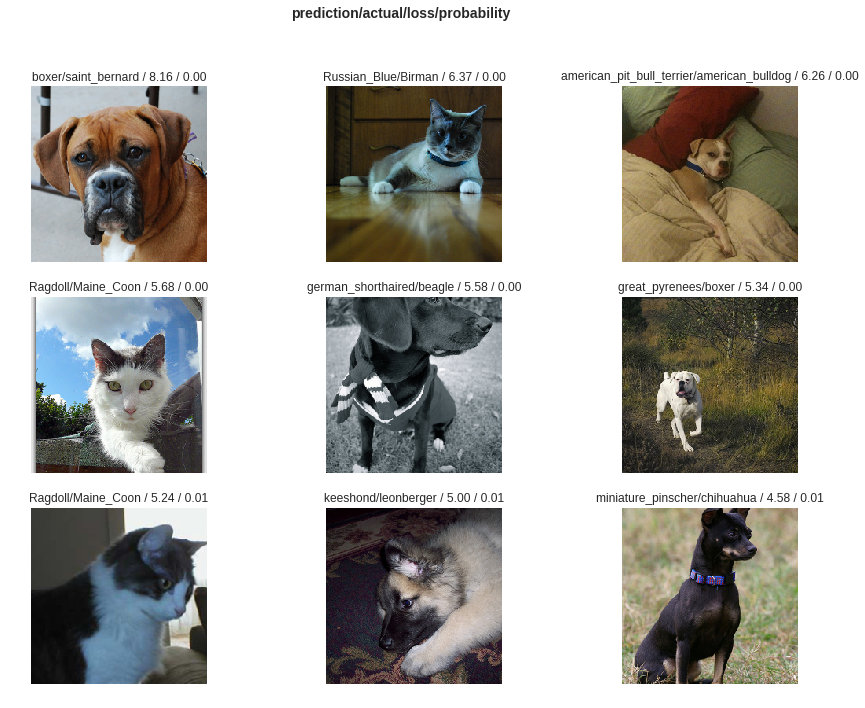

Another option is to plot all misclassifications using a confusion matrix:

```
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
```
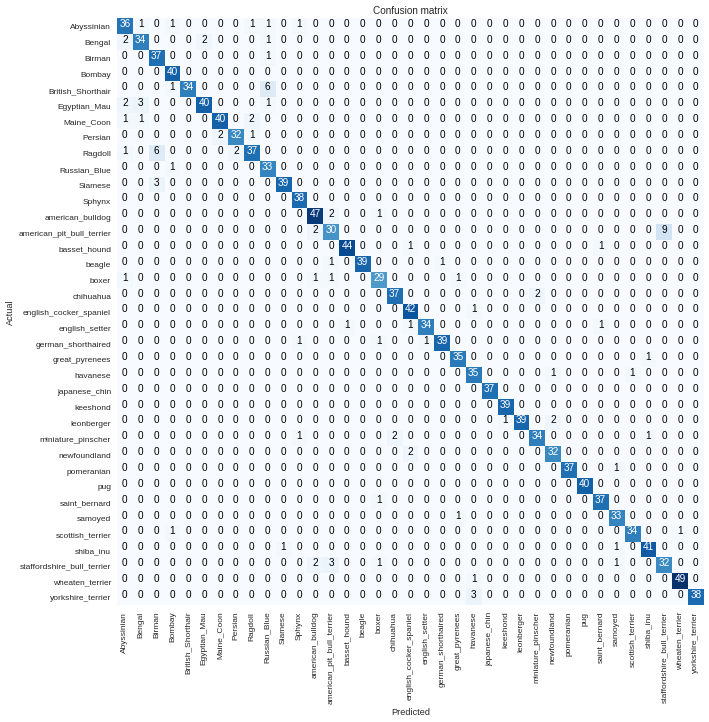

If you notice above, a lot of classes have values `1`. To view the list of classes most misclassified as a list, use:

```python
>>> learn.most_confused(min_val=2) # display descending order all values other than diagonal. Ignore 1s though.

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 6),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Siamese', 'Birman', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Ragdoll', 'Persian', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('leonberger', 'newfoundland', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('newfoundland', 'english_cocker_spaniel', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]
 ```

## Model fine-tuning
So far, we took a `resnet34` model, added a few layers to the end and trained. This was very fast. However, to improve this furture, we need to retrain the whole model, meaning, all its layers.

`resnet34` has `34` layers, `resnet50` has `50` layers. For instance, these are how the layers in resnet look like
 1. layer 1 - looks for edges
 2. layer 2 - activates for two edges, curves. Thus can detect window, table corners, circles such as clocks
 3. layer 3 - for patterns of layer 2 - thus can sense geometric shapes, lines of text or barcode
 4. layer 4 - dog faces
 5. layer 5 - people faces, eyeball of animaps, tires, faces of breeds of dogs
 
 Thus earlier, when we trained on resnet 34, we kept these layers as is and only trained on a few on top of them. To tune the model, we don't really have to change levels 1,2 which are fundamental. There are not many ways to improve levels 1,2. As levels increase, different levels of semantic complexity are handled.
 
However, when we make the resnet learn on all layers, it performs worse! To balance, we unfreeze, then load the saved model we had earlier. Then we ask it to run a *learning rate finder*. The learning rate is pretty important, it says, "how quickly am I updating the parameters in my model". The general pattern of lr rate is, it improves and then degenerates after some point.

Thus the general pattern advocated is to use the lr finder to find the shape of learning rate. Then unfreeze and call fit method with appropriate learning rate window. This trains the lower layers at a rate and higher abstraction layers are a different rate.


```python
>>> learn.lr_find()
>>> learn.recorder.plot()
```
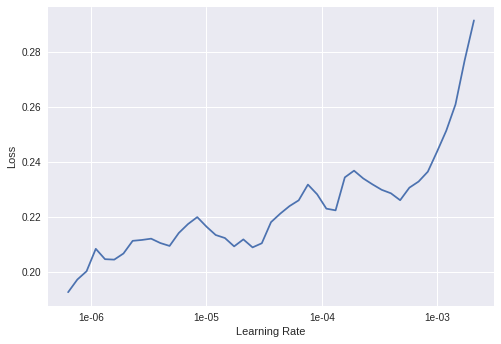

As you see the plot I have is quite different from what Jeremy has in his lecture. Not sure why. But the concept that loss decreases, plateaus then increases can be seen.

I will retrian the model by **unfreezing** it and training with specific learning rate.

```python
>>> learn.unfreeze()
>>> learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))
```
which leads to
```
Total time: 04:17

epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.233426 	0.213525 	0.067659 	02:08
1 	0.214522 	0.208705 	0.064953 	02:09
```

This gives me a model with error rate of `6.4%`, while I already had a `6%` error rate.

### Deeper layers
Another option is to use `resnet50`. However a typical GPU with `16`GB RAM is insufficient to handle this deep of layers.